In [ ]:
import os
import sys
import torch
import random
import pickle
import argparse
import numpy as np
import torch.nn as nn
from tqdm import tqdm
import torch.optim as optim
from collections import deque
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/gridworld_trap

/content/drive/MyDrive/gridworld_trap


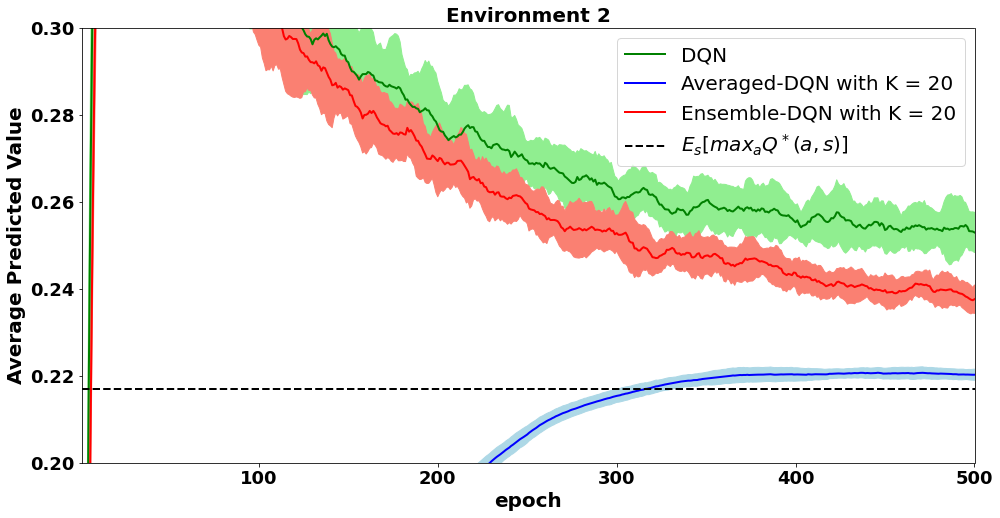

In [ ]:
DQN_arr = []
AVERAGE_DQN_20_arr = []
ENSEMBLE_DQN_20_arr = []

for i in range(1, 21):
  DQN = np.load("DQN_try/result/test_q_{}.npy".format(i))
  AVERAGE_DQN_20 = np.load("AVERAGE-DQN_20_try/result/test_q_{}.npy".format(i))
  ENSEMBLE_DQN_20 = np.load("ENSEMBLE-DQN_try/result/test_q_{}.npy".format(i))

  DQN_arr.append(DQN)
  AVERAGE_DQN_20_arr.append(AVERAGE_DQN_20)
  ENSEMBLE_DQN_20_arr.append(ENSEMBLE_DQN_20)

DQN_arr = np.array(DQN_arr)
AVERAGE_DQN_20_arr = np.array(AVERAGE_DQN_20_arr)
ENSEMBLE_DQN_20_arr = np.array(ENSEMBLE_DQN_20_arr)

DQN_mean = np.mean(DQN_arr, axis = 0)
AVERAGE_DQN_20_mean = np.mean(AVERAGE_DQN_20_arr, axis = 0)
ENSEMBLE_DQN_20_mean = np.mean(ENSEMBLE_DQN_20_arr, axis = 0)

DQN_std = np.std(DQN_arr, axis = 0) 
AVERAGE_DQN_20_std = np.std(AVERAGE_DQN_20_arr, axis = 0)
ENSEMBLE_DQN_20_std = np.std(ENSEMBLE_DQN_20_arr, axis = 0)

plt.figure(figsize = (16, 8))
plt.margins(0)
plt.plot(np.arange(500) + 1, DQN_mean, color = 'green', label = 'DQN', linewidth = 2)
plt.fill_between(np.arange(500) + 1, DQN_mean - DQN_std, DQN_mean + DQN_std, color = 'lightgreen')
plt.plot(np.arange(500) + 1, AVERAGE_DQN_20_mean, color = 'blue', label = "Averaged-DQN with K = 20", linewidth = 2)
plt.fill_between(np.arange(500) + 1, AVERAGE_DQN_20_mean - AVERAGE_DQN_20_std, AVERAGE_DQN_20_mean + AVERAGE_DQN_20_std, color = 'lightblue')
plt.plot(np.arange(500) + 1, ENSEMBLE_DQN_20_mean, color = 'red', label = "Ensemble-DQN with K = 20", linewidth = 2)
plt.fill_between(np.arange(500) + 1, ENSEMBLE_DQN_20_mean - ENSEMBLE_DQN_20_std, ENSEMBLE_DQN_20_mean + ENSEMBLE_DQN_20_std, color = 'salmon')
plt.axhline(y = 0.217, color='black', linestyle='--', label = r'$E_s[max_aQ^*(a,s)]$', linewidth = 2)
plt.ylim(0.2, 0.3)
plt.rcParams['axes.linewidth'] = 2
plt.title("Environment 2", fontsize = 20, weight = "bold")
plt.xlabel("epoch", fontsize = 20, weight = "bold")
plt.ylabel("Average Predicted Value", fontsize = 20, weight = "bold")
plt.xticks(fontsize = 18, weight = "bold")
plt.yticks(fontsize = 18, weight = "bold")
plt.legend(fontsize = 20)
plt.savefig('trap_1.png', dpi = 400)

In [ ]:
DQN_arr = []
DDQN_arr = []
AVERAGE_DQN_5_arr = []
AVERAGE_DQN_10_arr = []
AVERAGE_DQN_20_arr = []
AVERAGE_DDQN_10_arr = []
AVERAGE_DDQN_20_arr = []

for i in range(1, 41):
  DQN = np.load("DQN_try/result/test_q_{}.npy".format(i))
  DDQN = np.load("DDQN_try/result/test_q_{}.npy".format(i))
  AVERAGE_DQN_5 = np.load("AVERAGE-DQN_5_try/result/test_q_{}.npy".format(i))
  AVERAGE_DQN_10 = np.load("AVERAGE-DQN_10_try/result/test_q_{}.npy".format(i))
  AVERAGE_DQN_20 = np.load("AVERAGE-DQN_20_try/result/test_q_{}.npy".format(i))
  AVERAGE_DDQN_10 = np.load("AVERAGE-DDQN_10_try/result/test_q_{}.npy".format(i))
  AVERAGE_DDQN_20 = np.load("AVERAGE-DDQN_20_try/result/test_q_{}.npy".format(i))

  DQN_arr.append(DQN)
  DDQN_arr.append(DDQN)
  AVERAGE_DQN_5_arr.append(AVERAGE_DQN_5)
  AVERAGE_DQN_10_arr.append(AVERAGE_DQN_10)
  AVERAGE_DQN_20_arr.append(AVERAGE_DQN_20)
  AVERAGE_DDQN_10_arr.append(AVERAGE_DDQN_10)
  AVERAGE_DDQN_20_arr.append(AVERAGE_DDQN_20)

DQN_arr = np.array(DQN_arr)
DDQN_arr = np.array(DDQN_arr)
AVERAGE_DQN_5_arr = np.array(AVERAGE_DQN_5_arr)
AVERAGE_DQN_10_arr = np.array(AVERAGE_DQN_10_arr)
AVERAGE_DQN_20_arr = np.array(AVERAGE_DQN_20_arr)
AVERAGE_DDQN_10_arr = np.array(AVERAGE_DDQN_10_arr)
AVERAGE_DDQN_20_arr = np.array(AVERAGE_DDQN_20_arr)

In [ ]:
DQN_mean = np.mean(DQN_arr, axis = 0)
DDQN_mean = np.mean(DDQN_arr, axis = 0)
AVERAGE_DQN_5_mean = np.mean(AVERAGE_DQN_5_arr, axis = 0)
AVERAGE_DQN_10_mean = np.mean(AVERAGE_DQN_10_arr, axis = 0)
AVERAGE_DQN_20_mean = np.mean(AVERAGE_DQN_20_arr, axis = 0)
AVERAGE_DDQN_10_mean = np.mean(AVERAGE_DDQN_10_arr, axis = 0)
AVERAGE_DDQN_20_mean = np.mean(AVERAGE_DDQN_20_arr, axis = 0)

DQN_std = np.std(DQN_arr, axis = 0) 
DDQN_std = np.std(DDQN_arr, axis = 0) 
AVERAGE_DQN_5_std = np.std(AVERAGE_DQN_5_arr, axis = 0)
AVERAGE_DQN_10_std = np.std(AVERAGE_DQN_10_arr, axis = 0)
AVERAGE_DQN_20_std = np.std(AVERAGE_DQN_20_arr, axis = 0)
AVERAGE_DDQN_10_std = np.std(AVERAGE_DDQN_10_arr, axis = 0)
AVERAGE_DDQN_20_std = np.std(AVERAGE_DDQN_20_arr, axis = 0)

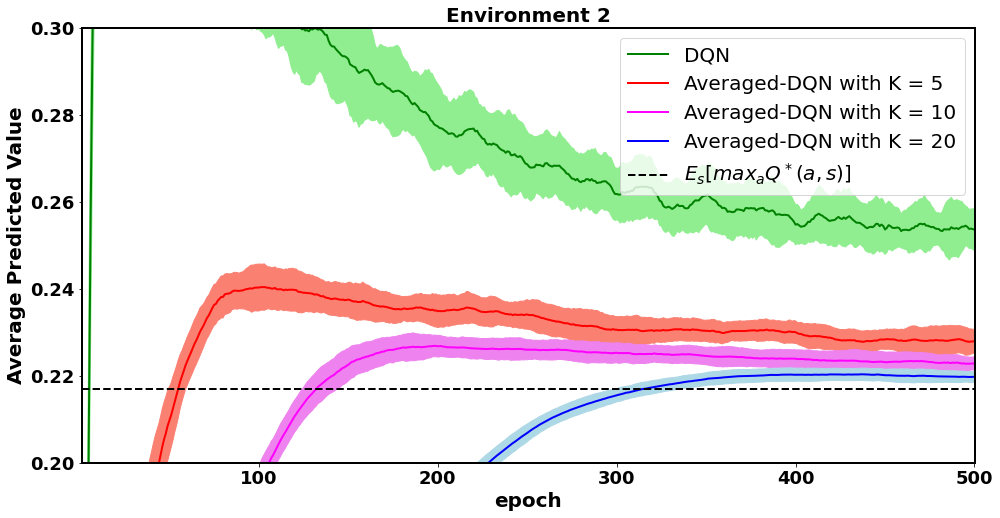

In [ ]:
plt.figure(figsize = (16, 8))
plt.margins(0)
plt.plot(np.arange(500) + 1, DQN_mean, color = 'green', label = 'DQN', linewidth = 2)
plt.fill_between(np.arange(500) + 1, DQN_mean - DQN_std, DQN_mean + DQN_std, color = 'lightgreen')
plt.plot(np.arange(500) + 1, AVERAGE_DQN_5_mean, color = 'red', label = "Averaged-DQN with K = 5", linewidth = 2)
plt.fill_between(np.arange(500) + 1, AVERAGE_DQN_5_mean - AVERAGE_DQN_5_std, AVERAGE_DQN_5_mean + AVERAGE_DQN_5_std, color = 'salmon')
plt.plot(np.arange(500) + 1, AVERAGE_DQN_10_mean, color = 'fuchsia', label = "Averaged-DQN with K = 10", linewidth = 2)
plt.fill_between(np.arange(500) + 1, AVERAGE_DQN_10_mean - AVERAGE_DQN_10_std, AVERAGE_DQN_10_mean + AVERAGE_DQN_10_std, color = 'violet')
plt.plot(np.arange(500) + 1, AVERAGE_DQN_20_mean, color = 'blue', label = "Averaged-DQN with K = 20", linewidth = 2)
plt.fill_between(np.arange(500) + 1, AVERAGE_DQN_20_mean - AVERAGE_DQN_20_std, AVERAGE_DQN_20_mean + AVERAGE_DQN_20_std, color = 'lightblue')
plt.axhline(y = 0.217, color='black', linestyle='--', label = r'$E_s[max_aQ^*(a,s)]$', linewidth = 2)
plt.ylim(0.2, 0.3)
plt.rcParams['axes.linewidth'] = 2
plt.title("Environment 2", fontsize = 20, weight = "bold")
plt.xlabel("epoch", fontsize = 20, weight = "bold")
plt.ylabel("Average Predicted Value", fontsize = 20, weight = "bold")
plt.xticks(fontsize = 18, weight = "bold")
plt.yticks(fontsize = 18, weight = "bold")
plt.legend(fontsize = 20)
plt.savefig('trap_2.png', dpi = 400)

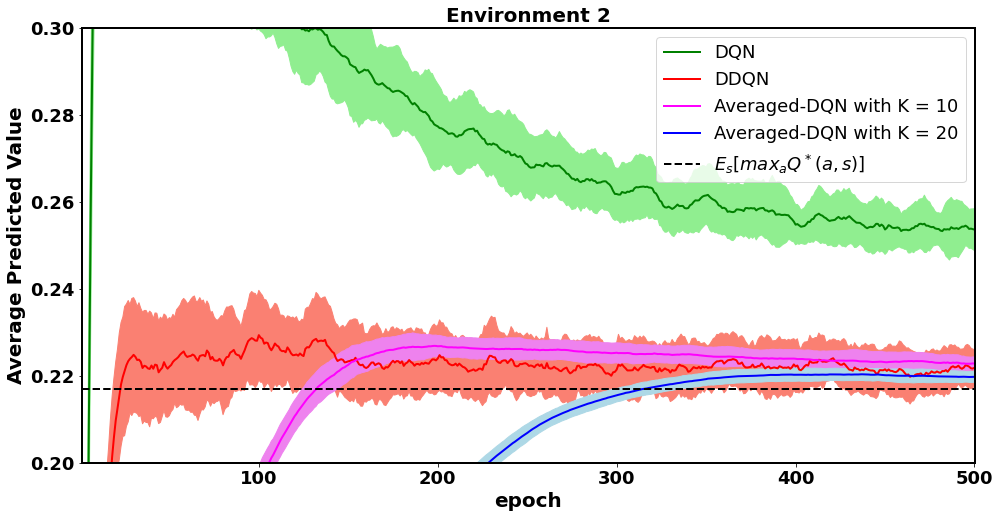

In [ ]:
plt.figure(figsize = (16, 8))
plt.margins(0)
plt.plot(np.arange(500) + 1, DQN_mean, color = 'green', label = 'DQN', linewidth = 2)
plt.fill_between(np.arange(500) + 1, DQN_mean - DQN_std, DQN_mean + DQN_std, color = 'lightgreen')
plt.plot(np.arange(500) + 1, DDQN_mean, color = 'red', label = "DDQN",  linewidth = 2)
plt.fill_between(np.arange(500) + 1, DDQN_mean - DDQN_std, DDQN_mean + DDQN_std, color = 'salmon')
plt.plot(np.arange(500) + 1, AVERAGE_DQN_10_mean, color = 'fuchsia', label = "Averaged-DQN with K = 10",  linewidth = 2)
plt.fill_between(np.arange(500) + 1, AVERAGE_DQN_10_mean - AVERAGE_DQN_10_std, AVERAGE_DQN_10_mean + AVERAGE_DQN_10_std, color = 'violet')
plt.plot(np.arange(500) + 1, AVERAGE_DQN_20_mean, color = 'blue', label = "Averaged-DQN with K = 20", linewidth = 2)
plt.fill_between(np.arange(500) + 1, AVERAGE_DQN_20_mean - AVERAGE_DQN_20_std, AVERAGE_DQN_20_mean + AVERAGE_DQN_20_std, color = 'lightblue')
plt.axhline(y = 0.217, color='black', linestyle='--', label = r'$E_s[max_aQ^*(a,s)]$',  linewidth = 2)
plt.ylim(0.2, 0.3)
plt.rcParams['axes.linewidth'] = 2
plt.title("Environment 2", fontsize = 20, weight = "bold")
plt.xlabel("epoch", fontsize = 20, weight = "bold")
plt.ylabel("Average Predicted Value", fontsize = 20, weight = "bold")
plt.xticks(fontsize = 18, weight = "bold")
plt.yticks(fontsize = 18, weight = "bold")
plt.legend(fontsize = 20, loc = 1)
plt.savefig('trap_3.png', dpi = 400)

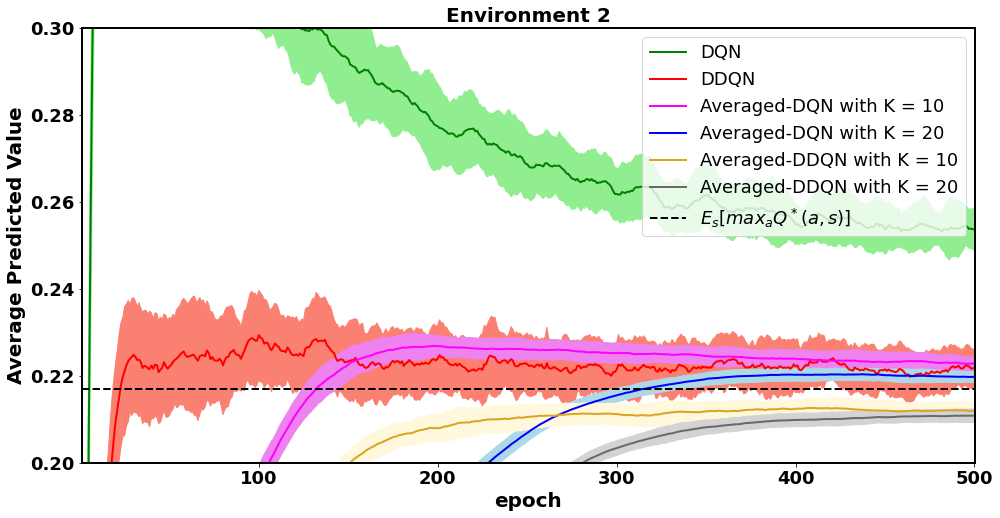

In [ ]:
plt.figure(figsize = (16, 8), linewidth=3)
plt.margins(0)
plt.plot(np.arange(500) + 1, DQN_mean, color = 'green', label = 'DQN',  linewidth = 2)
plt.fill_between(np.arange(500) + 1, DQN_mean - DQN_std, DQN_mean + DQN_std, color = 'lightgreen')
plt.plot(np.arange(500) + 1, DDQN_mean, color = 'red', label = "DDQN",  linewidth = 2)
plt.fill_between(np.arange(500) + 1, DDQN_mean - DDQN_std, DDQN_mean + DDQN_std, color = 'salmon')
plt.plot(np.arange(500) + 1, AVERAGE_DQN_10_mean, color = 'fuchsia', label = "Averaged-DQN with K = 10",  linewidth = 2)
plt.fill_between(np.arange(500) + 1, AVERAGE_DQN_10_mean - AVERAGE_DQN_10_std, AVERAGE_DQN_10_mean + AVERAGE_DQN_10_std, color = 'violet')
plt.plot(np.arange(500) + 1, AVERAGE_DQN_20_mean, color = 'blue', label = "Averaged-DQN with K = 20",  linewidth = 2)
plt.fill_between(np.arange(500) + 1, AVERAGE_DQN_20_mean - AVERAGE_DQN_20_std, AVERAGE_DQN_20_mean + AVERAGE_DQN_20_std, color = 'lightblue')

plt.plot(np.arange(500) + 1, AVERAGE_DDQN_10_mean, color = 'goldenrod', label = "Averaged-DDQN with K = 10",  linewidth = 2)
plt.fill_between(np.arange(500) + 1, AVERAGE_DDQN_10_mean - AVERAGE_DDQN_10_std, AVERAGE_DDQN_10_mean + AVERAGE_DDQN_10_std, color = 'cornsilk')
plt.plot(np.arange(500) + 1, AVERAGE_DDQN_20_mean, color = 'dimgrey', label = "Averaged-DDQN with K = 20",  linewidth = 2)
plt.fill_between(np.arange(500) + 1, AVERAGE_DDQN_20_mean - AVERAGE_DDQN_20_std, AVERAGE_DDQN_20_mean + AVERAGE_DDQN_20_std, color = 'lightgrey')
plt.axhline(y = 0.217, color='black', linestyle='--', label = r'$E_s[max_aQ^*(a,s)]$',  linewidth = 2)
plt.ylim(0.2, 0.3)
plt.rcParams['axes.linewidth'] = 2
plt.title("Environment 2", fontsize = 20, weight = "bold")
plt.xlabel("epoch", fontsize = 20, weight = "bold")
plt.ylabel("Average Predicted Value", fontsize = 20, weight = "bold")
plt.xticks(fontsize = 18, weight = "bold")
plt.yticks(fontsize = 18, weight = "bold")
plt.legend(fontsize = 20)
plt.savefig('trap_4.png', dpi = 400)